In [28]:
# pip install jieba
# pip install pyecharts
import jieba
from wordcloud import WordCloud
import re
import pandas as pd


In [29]:
pwd

'/Users/hazelchui/Desktop/UChicago/Winter 2023/CMSC 33260 Internet Censorship'

In [32]:
## Load data 
df_before = pd.read_csv('before.csv')
df_during = pd.read_csv('during.csv')
df_after = pd.read_csv('after.csv')

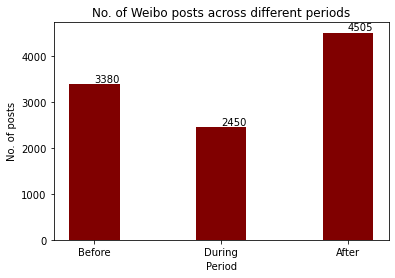

In [69]:
import matplotlib.pyplot as plt
data = {'Before':len(df_before), 'During':len(df_during), 
        'After':len(df_after)}
period = list(data.keys())
values = list(data.values())
   
# creating the bar plot
plt.bar(period, values, color ='maroon',
        width = 0.4)

# Add annotation to bars 
for i, v in enumerate(values):
    plt.text(i, v+50, str(v))

plt.xlabel("Period")
plt.ylabel("No. of posts")
plt.title("No. of Weibo posts across different periods")
plt.savefig('bar.png')

plt.show()


In [22]:
# Stopwords
with open('cn_stopwords.txt') as f:
    stopword = f.readlines()
    stopwords = [l.strip('\n\r') for l in stopword]    

In [23]:
#去掉表情和一些不必要的符号
def format_content(content):
    content = content.replace(u'\xa0', u' ')
    content = re.sub(r'\[.*?\]','',content)
    content = content.replace('\n', ' ')
    return content

In [24]:
#画出词云
def create_wordcloud(content,image='weibo.jpg',max_words=5000,max_font_size=50):
    words = jieba.lcut(content)
    newtxt = ''.join(words)
    word_cloud = WordCloud(stopwords = stopwords, font_path = "SourceHanSerifK-Light.otf", 
                           max_words=max_words, background_color='white', 
                           max_font_size=max_font_size
                          ).generate(newtxt)
    word_cloud.to_file(image)

In [25]:
# Before
## pd series to string
post = df_before['微博正文'].to_string(index=False)

# Clean data
post = format_content(post)

# Generate
create_wordcloud(post, image='weibo_before.jpg',max_words=5000,max_font_size=50)

In [26]:
# During
## pd series to string
post = df_during['微博正文'].to_string(index=False)

# Clean data
post = format_content(post)

# Generate
create_wordcloud(post, image='weibo_during.jpg',max_words=5000,max_font_size=50)

In [27]:
# After
## pd series to string
post = df_after['微博正文'].to_string(index=False)

# Clean data
post = format_content(post)

# Generate
create_wordcloud(post, image='weibo_after.jpg',max_words=5000,max_font_size=50)